In [57]:
pip install tensorflow transformers shap lime fastapi uvicorn pandas scikit-learn keras-tuner numpy


In [58]:
from sklearn.preprocessing import LabelEncoder


In [59]:
pip install lime


In [60]:
from lime.lime_text import LimeTextExplainer


In [61]:
import json
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Bidirectional

In [79]:
import json

# Read the file and load the JSON objects
with open('/content/Sarcasm_Headlines_Dataset_v2.json', 'r') as f:
    data = []
    for line in f:
        data.append(json.loads(line))  # Load each line as a separate JSON object

# Now `data` will contain a list of JSON objects
print(data[0])  # Print the first entry to check the structure


{'is_sarcastic': 1, 'headline': 'thirtysomething scientists unveil doomsday clock of hair loss', 'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'}


In [80]:
with open('/content/Sarcasm_Headlines_Dataset_v2.json', 'r') as f:
    data = [json.loads(line) for line in f]

In [81]:
df = pd.DataFrame(data)

In [82]:
print(df.head())


   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...  


In [83]:
X = df['headline'].values  # Input text (headlines)
y = df['is_sarcastic'].values  # Labels (sarcastic or not)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
max_vocab = 10000  # Top 10,000 most frequent words
max_len = 100  # Maximum length of each headline
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [86]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [87]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [88]:
print("Shape of training data:", X_train_pad.shape)
print("Shape of testing data:", X_test_pad.shape)


Shape of training data: (22895, 100)
Shape of testing data: (5724, 100)


In [89]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=max_vocab, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
history = model.fit(X_train_pad, y_train_encoded, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_encoded))



Epoch 1/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.7199 - loss: 0.5150 - val_accuracy: 0.8581 - val_loss: 0.3287
Epoch 2/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8487 - loss: 0.4059 - val_accuracy: 0.8550 - val_loss: 0.3554
Epoch 3/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9443 - loss: 0.1605 - val_accuracy: 0.8501 - val_loss: 0.3875
Epoch 4/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9695 - loss: 0.0948 - val_accuracy: 0.8473 - val_loss: 0.4347
Epoch 5/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9817 - loss: 0.0629 - val_accuracy: 0.8496 - val_loss: 0.5294


In [104]:
# Prediction wrapper for LIME
class_names = ['Not Sarcastic', 'Sarcastic']

def predict_proba(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=max_len)
    predictions = model.predict(padded)
    return np.hstack((1 - predictions, predictions))

# LIME explainer
explainer = LimeTextExplainer(class_names=class_names)

# Prediction + Explanation Loop
while True:
    print("\nType a sentence to detect sarcasm (type 'exit' to stop):")
    sentence = input("📝 Your sentence: ")
    if sentence.lower() == 'exit':
        break

    # Predict
    sequence = tokenizer.texts_to_sequences([sentence])
    padded = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded)
    threshold = 0.05  # adjust as needed
    result = "Sarcastic" if prediction[0][0] > threshold else "Not Sarcastic"
    confidence = float(prediction[0][0])

    print(f"\n🤖 Prediction: {result} (Confidence: {confidence:.4f})")

    # Explain with LIME
    exp = explainer.explain_instance(sentence, predict_proba, num_features=8)
    print("\n🧠 Explanation:")
    for word, weight in exp.as_list():
        print(f" - {word}: {weight:.4f}")



Type a sentence to detect sarcasm (type 'exit' to stop):
📝 Your sentence: I'm glad we are having this rehearsal dinner. I rarely practice my meals before I eat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

🤖 Prediction: Sarcastic (Confidence: 0.0506)
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

🧠 Explanation:
 - glad: 0.2439
 - we: -0.1911
 - I: -0.1866
 - having: 0.1774
 - my: -0.1721
 - m: -0.1508
 - are: -0.0846
 - this: -0.0790

Type a sentence to detect sarcasm (type 'exit' to stop):
📝 Your sentence: medics drop soccer player from stretcher; he's ticked
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

🤖 Prediction: Not Sarcastic (Confidence: 0.0386)
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

🧠 Explanation:
 - soccer: -0.6043
 - drop: 0.1470
 - he: 0.1282
 - s: -0.0957
 - from: 0.0178
 - stretcher: 0.0138
 - ticked: 0.0084
 - player: 0.0075

Type a sentence to detect sarcasm (type 'exit' to stop):
📝 Your sentence: good job failing in all subjects
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

🤖 Prediction: Sa

In [106]:
import pandas as pd
df = pd.DataFrame(data)
print(df['is_sarcastic'].value_counts())


is_sarcastic
0    14985
1    13634
Name: count, dtype: int64


Keras's built-in evaluation.



In [107]:
loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f"Test Accuracy: {accuracy:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8445 - loss: 0.5383
Test Accuracy: 0.8496


Manual scikit-learn evaluation.

In [108]:
y_pred_probs = model.predict(X_test_pad)
y_pred_classes = (y_pred_probs > 0.5).astype(int)
y_test_classes = np.array(y_test).reshape(-1, 1)


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [109]:
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("ROC AUC Score:", roc_auc_score(y_test_classes, y_pred_probs))

Accuracy: 0.84958071278826
ROC AUC Score: 0.9262405707325816


In [110]:
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=["Not Sarcastic", "Sarcastic"]))


Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.85      0.86      0.86      2995
    Sarcastic       0.85      0.83      0.84      2729

     accuracy                           0.85      5724
    macro avg       0.85      0.85      0.85      5724
 weighted avg       0.85      0.85      0.85      5724



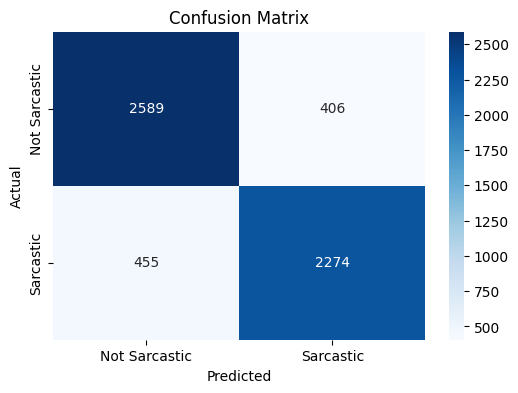

In [111]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Sarcastic", "Sarcastic"], yticklabels=["Not Sarcastic", "Sarcastic"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

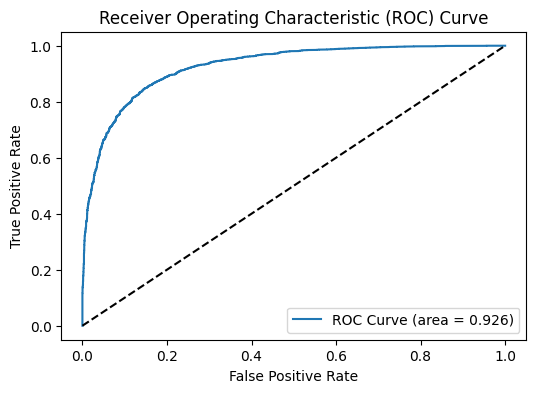

In [112]:
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred_probs)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="ROC Curve (area = {:.3f})".format(roc_auc_score(y_test_classes, y_pred_probs)))
plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()